# Sports and entertainment company analysis

**In this project I will analyze an SQL database of a sports and entertainment company that rents out it facilities to a various number of members (mainly focused on July and August of the year in question). I will try to create a big dataset in mySQL (the database contains 3 tables with important information about the company), then I will export the dataset as a CSV file, then read it in python and further analyze it in this notebook. I will try to find the most 'loyal' customer (so the member that books the faciities the most), I will try to get the performance for each facility (if it brings or loses money) and any kind of other analysis that I will see important for this dataset.**

**First, let's understand the data that we will use. For simplicity I will use screenshots of my MySQL Workbench**

First table of the database is the 'bookings' table, that represents as follows:

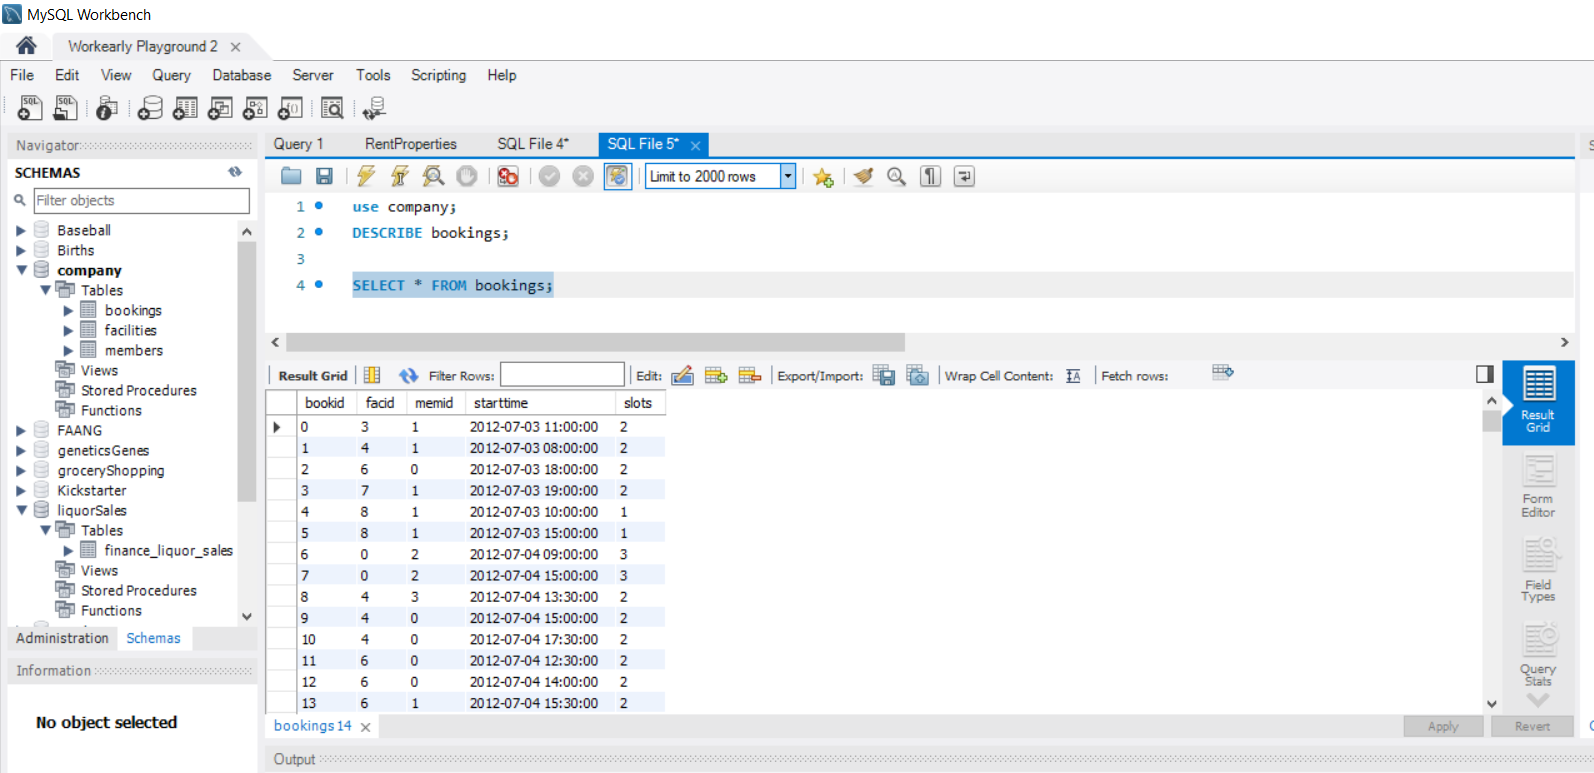

- 'bookid' - ID of the booking

- 'facid' - facility ID, as in which facility is being booked

- 'memid' - member ID, as in which member has booked the facility

- 'starttime' - exact start time of the booking

- 'slots' - how many slots did the person book for that particular facility

Let's explore the next table called 'faciities' and see how they connect:

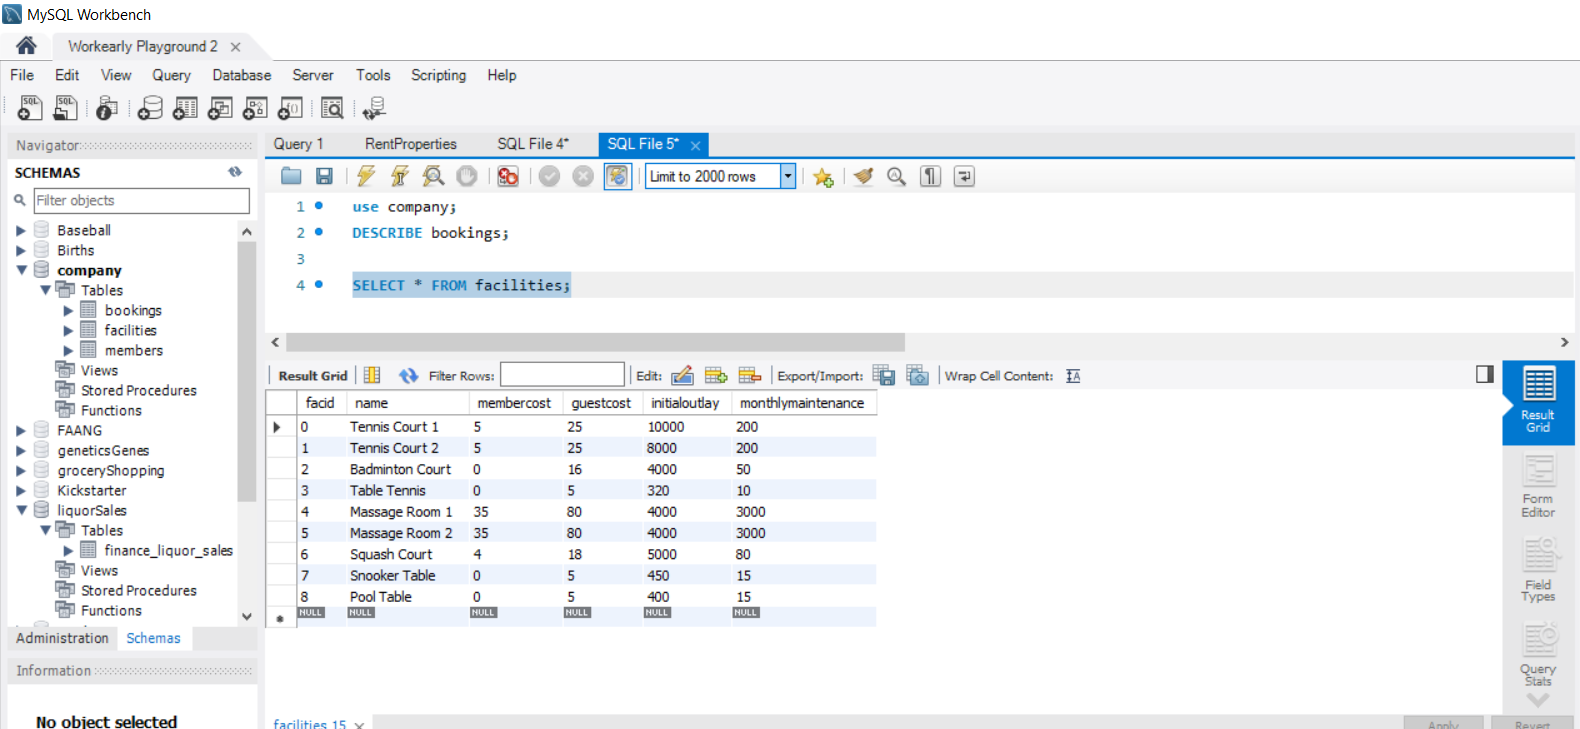

We can see that the company has 9 facilities to offer, let's understand the columns:

- 'facid' - it's already known from the previous table, and it stands as a primary key in this table and a foreign key to the 'bookings' table; it could be useful when we try to join the tables

- 'name' - it's the actual name of the offered service/facility

- 'membercost' - how much the booking of the facility costs for a member

- 'guestcost' - how much the booking of the facility costs for a non-member

- 'initialoutlay' - it isn't very clear, however a good guess could be how much was paid for the building of the facilities

- 'monthlymaintenance' - exactly how much money goes away on maintenance every month

- All prices are in dollars

Last table of the dataset is the 'members' table. Let's understand it:

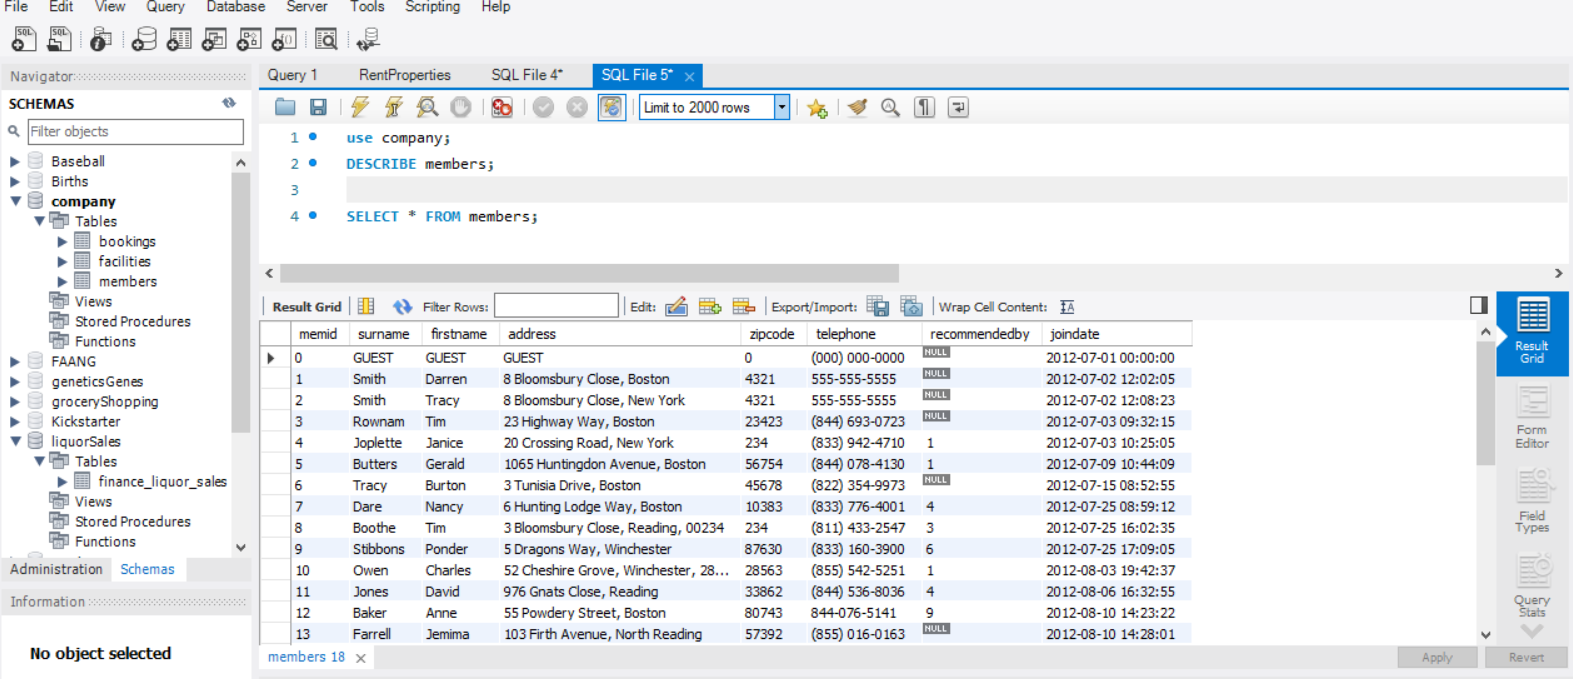

- 'memid' - already known from the first table, again, a good column to join the tables on

- 'surname' and 'firstname' - these are self-explanatory

- 'adress' - residence of the member

- 'zipcode' - zipcode for each members location

- 'telephone' - phone number

- 'recommendedby' - if a member was recommended by another member, and if yes which member

- 'joindate' - the date in which the member joined the company (for guest members it's just an arbitrary date and hour)

**Before joining all the data together, let's explore some facts that seem interesting to me using SQL**


First I would like to have a comparison between the number of bookings that are choosing free/cheapest services (snooker, pool, table tennis, badminton) versus the most expensive service (massage)



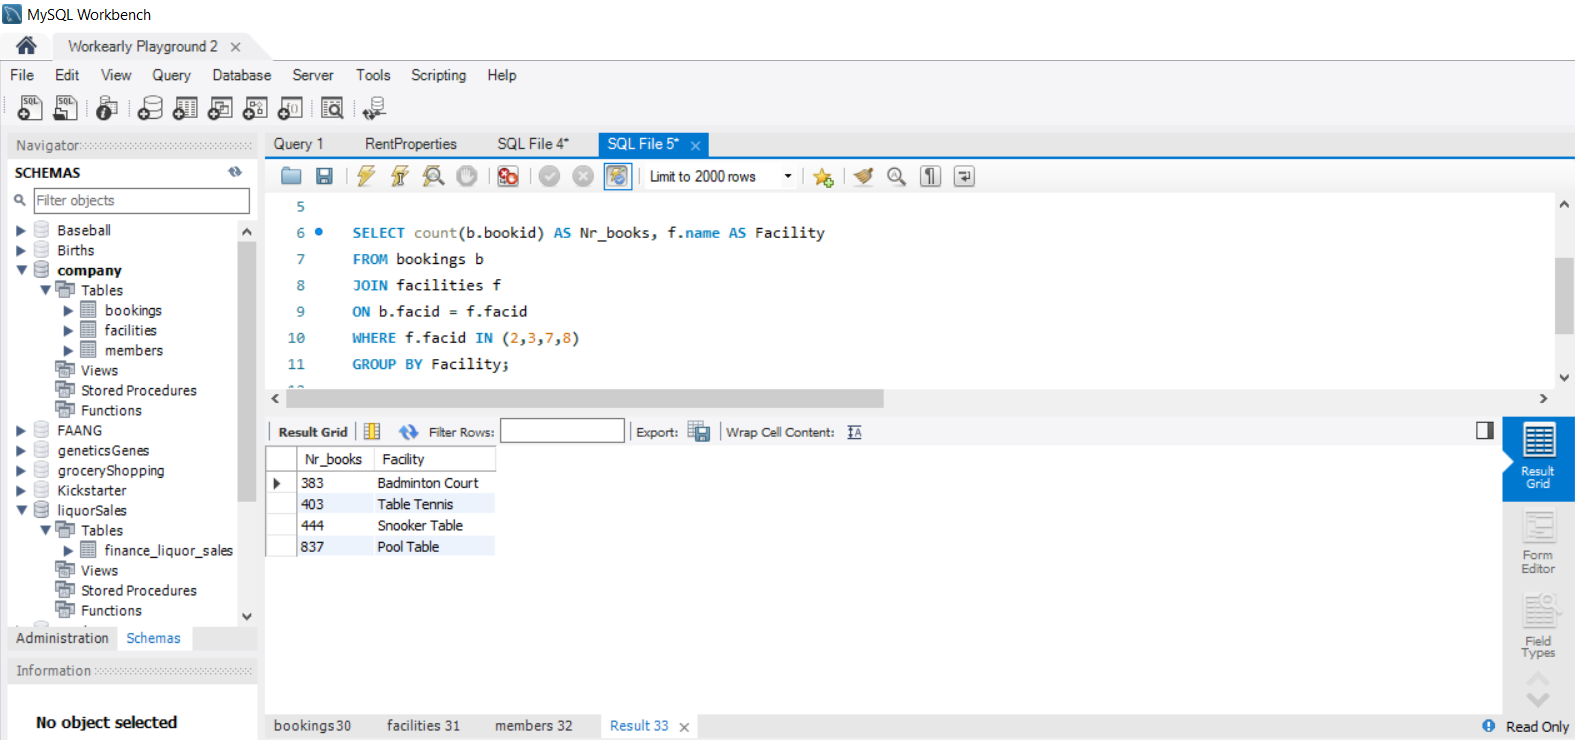

- It is somewhat understandable that the pool table is the most popular one, since it's the one that requires least skill and can be easily played with anybody for a fun time

In [1]:
#The total of these services however:
383 + 403 + 444 + 837

2067

So we have 2067 bookings for the free/cheapest services. Let's see if the people choose comfort and relax over a quick game of pool, snooker, etc:

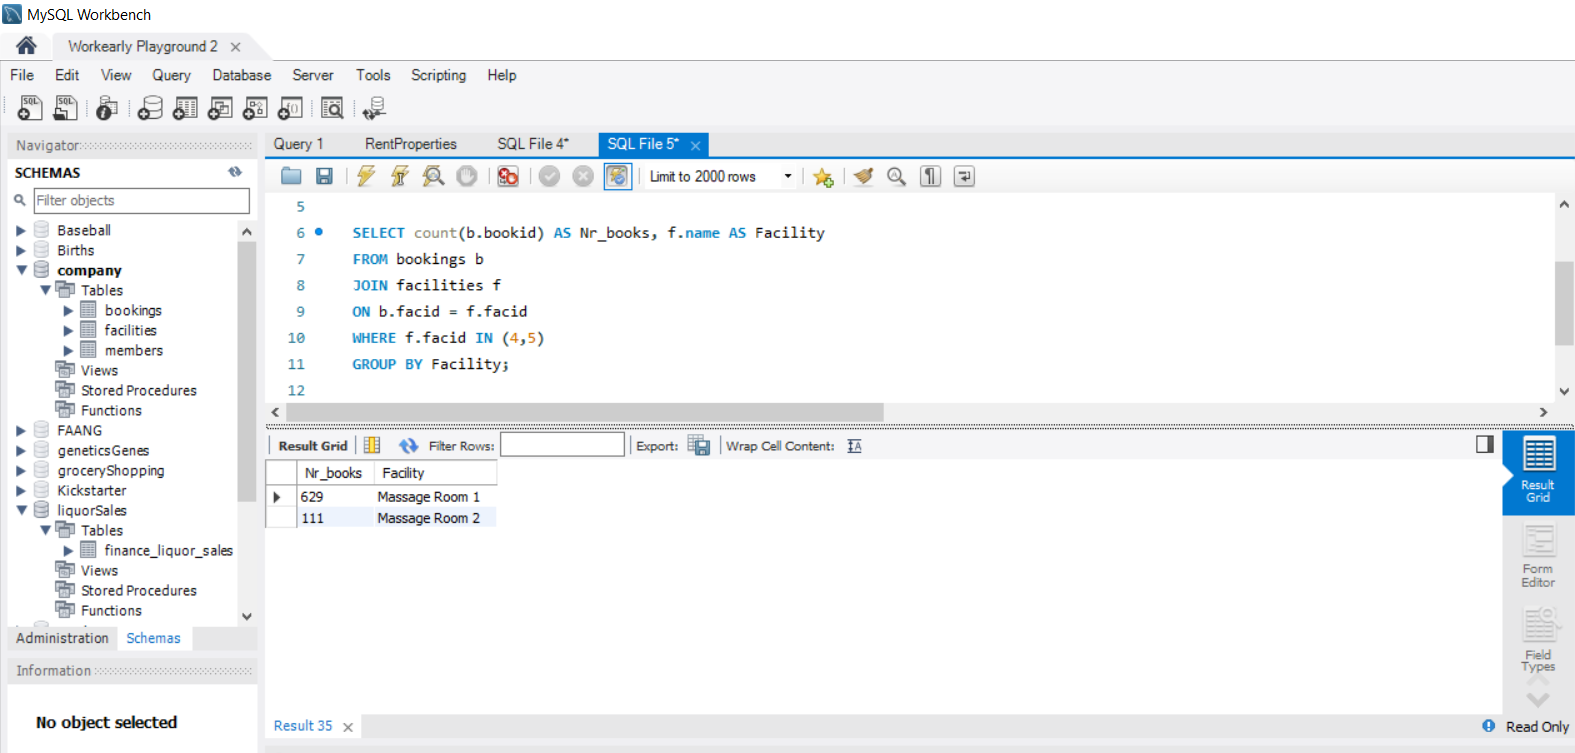

In [2]:
#The total of the massage services:
629 + 111

740

- Honestly, as expected, people tend to choose a cheap and fun time, over an expensive and relaxing one. This analysis was just a personal curiosity of mine, however, the company should look into the client feedback for massage room 2, since it's doing poorly compared to the first massage room (maybe the quality of the massage is not up to standards, or the aspect of the room, etc.)

Let's suppose the company wants to do an AD based on the 'tennis' keyword, and this company needs to know the members which used the tennis or table tennis courts, to send out personalized ads:

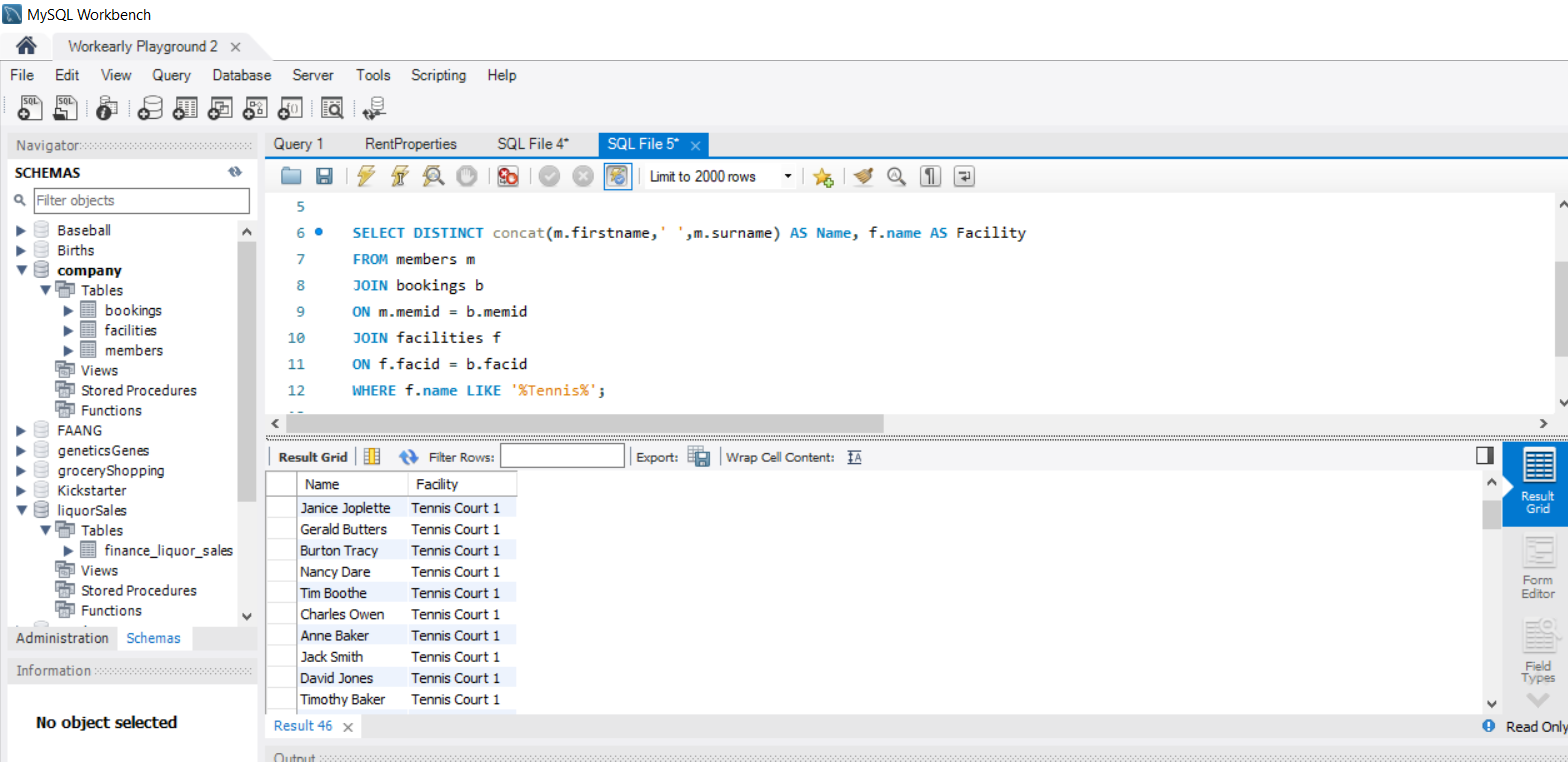

The personalized ads can be easily sent out to the reported members

In the next query I would like to showcase the total revenue brought in by each facility (it is important here to keep in mind that the prices vary from guests to members)

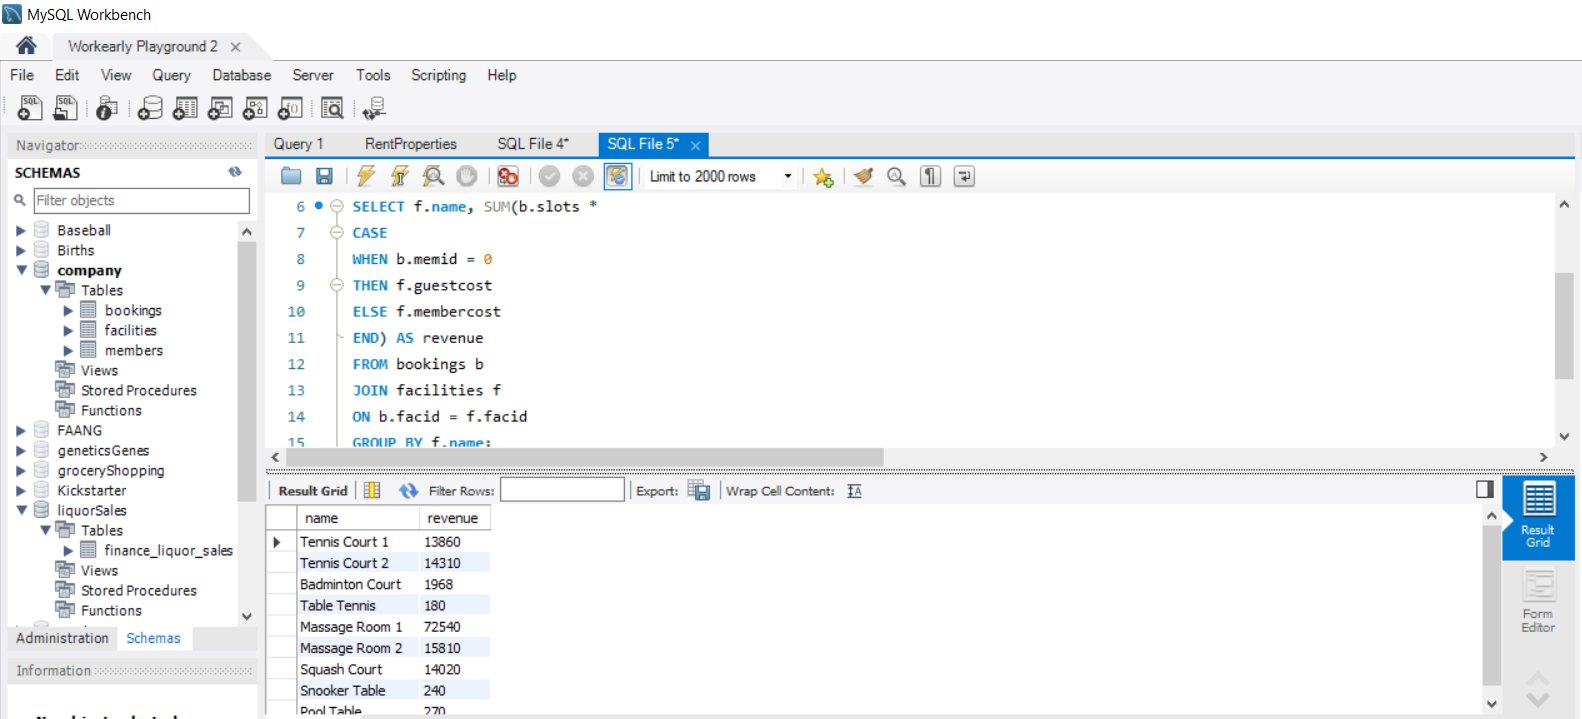


- We can see that the massage room 1 brought in the highest revenue in the last 2 months, however, the gap between the two massage rooms is extremely big, I hope they fixed it meanwhile :)

The last query that I will perform before exporting the dataset is a recursive query. All other queries could have been easily done in python, but the next query I'm finding more comfortable to be done in SQL. The next query will print out a recommandation chain: so X got recommanded by Y, who got recommanded by Z and so on

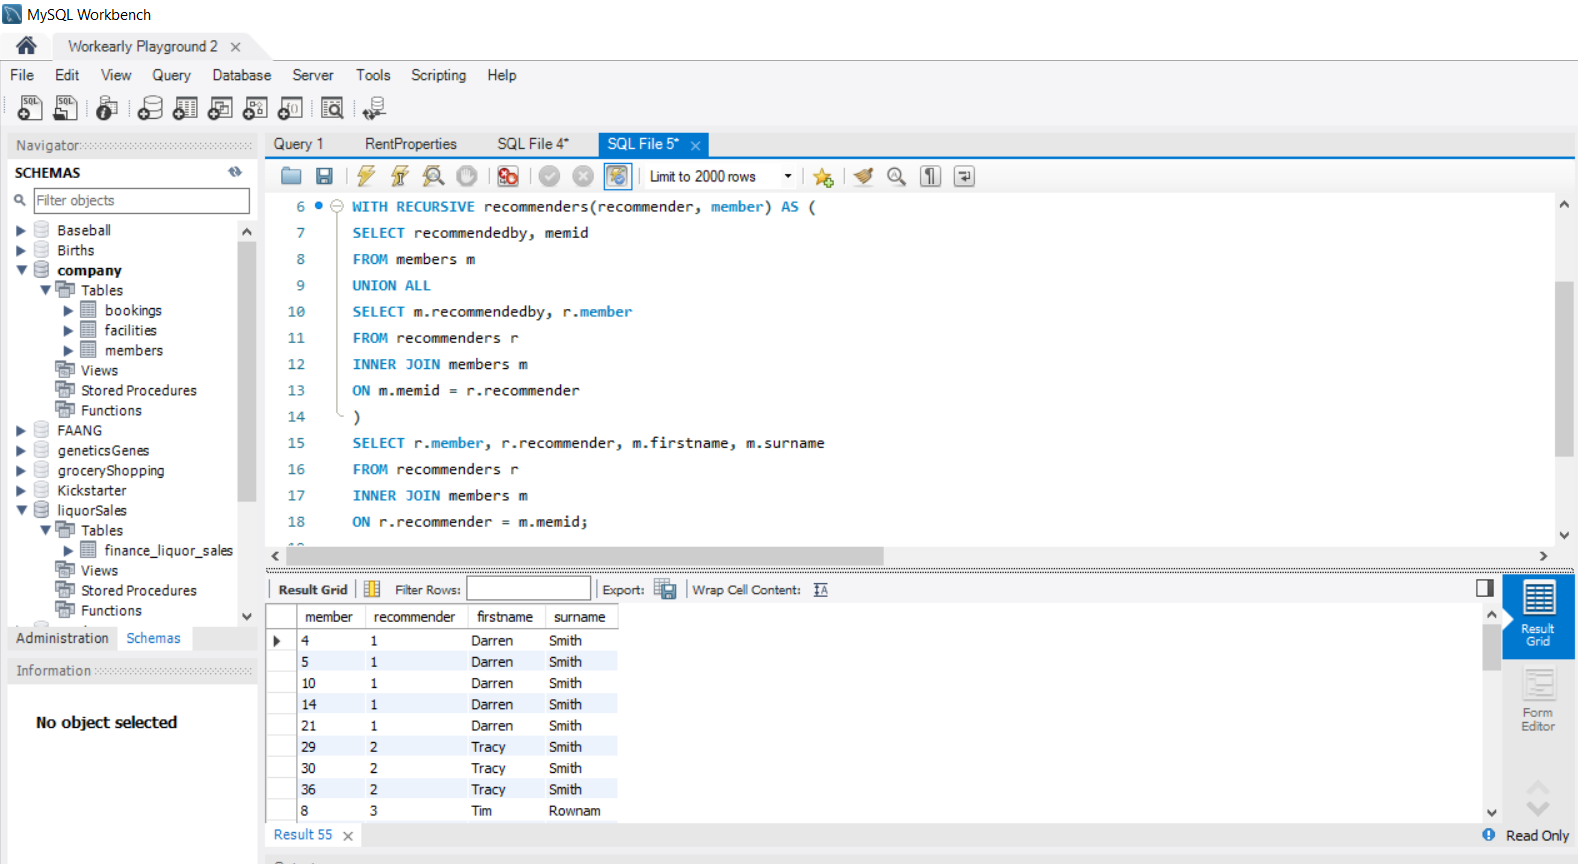




The last step using SQL is to prepare a final dataset to then be exported as a .csv file. Let's do it!


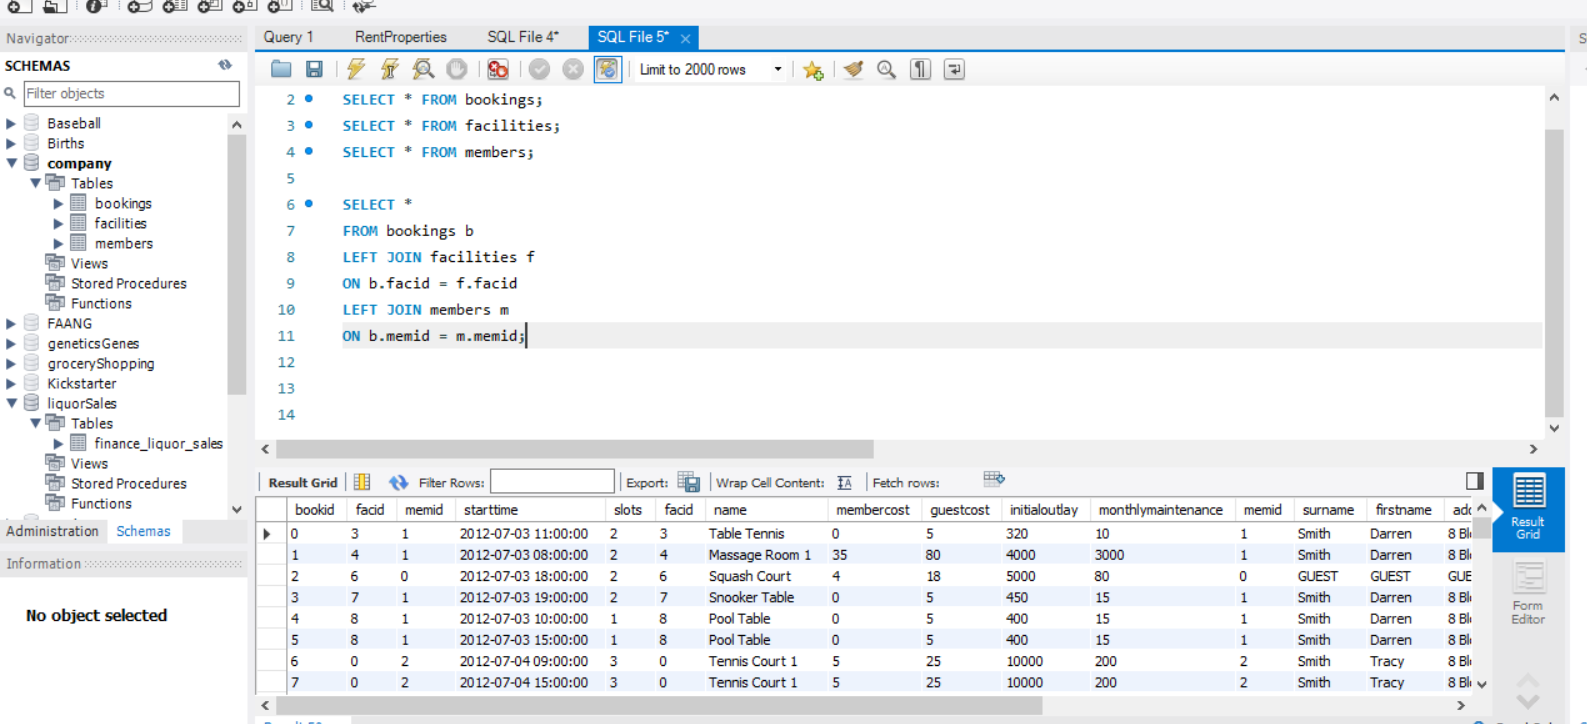

We have succesfully concatonated the three tables, now it's time to open the dataset here in the notebook, and use python to drop some columns, to deal with missing data, etc.

**Further exploring the dataset using Python**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime

In [4]:
df = pd.read_csv('S-E Comapny.csv', parse_dates=True)

In [5]:
df.head()

bookid  facid  memid            starttime  slots  facid.1            name  \
0       0      3      1  2012-07-03 11:00:00      2        3    Table Tennis   
1       1      4      1  2012-07-03 08:00:00      2        4  Massage Room 1   
2       2      6      0  2012-07-03 18:00:00      2        6    Squash Court   
3       3      7      1  2012-07-03 19:00:00      2        7   Snooker Table   
4       4      8      1  2012-07-03 10:00:00      1        8      Pool Table   

   membercost  guestcost  initialoutlay  monthlymaintenance  memid.1 surname  \
0           0          5            320                  10        1   Smith   
1          35         80           4000                3000        1   Smith   
2           4         18           5000                  80        0   GUEST   
3           0          5            450                  15        1   Smith   
4           0          5            400                  15        1   Smith   

  firstname                     address  zipcode       telephone  \
0    Darren  8 Bloomsbury Close, Boston     4321    555-555-5555   
1    Darren  8 Bloomsbury Close, Boston     4321    555-555-5555   
2     GUEST                       GUEST        0  (000) 000-0000   
3    Darren  8 Bloomsbury Close, Boston     4321    555-555-5555   
4    Darren  8 Bloomsbury Close, Boston     4321    555-555-5555   

   recommendedby             joindate  
0            NaN  2012-07-02 12:02:05  
1            NaN  2012-07-02 12:02:05  
2            NaN  2012-07-01 00:00:00  
3            NaN  2012-07-02 12:02:05  
4            NaN  2012-07-02 12:02:05

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookid              2000 non-null   int64  
 1   facid               2000 non-null   int64  
 2   memid               2000 non-null   int64  
 3   starttime           2000 non-null   object 
 4   slots               2000 non-null   int64  
 5   facid.1             2000 non-null   int64  
 6   name                2000 non-null   object 
 7   membercost          2000 non-null   int64  
 8   guestcost           2000 non-null   int64  
 9   initialoutlay       2000 non-null   int64  
 10  monthlymaintenance  2000 non-null   int64  
 11  memid.1             2000 non-null   int64  
 12  surname             2000 non-null   object 
 13  firstname           2000 non-null   object 
 14  address             2000 non-null   object 
 15  zipcode             2000 non-null   int64  
 16  teleph

We can see that we don't really have to deal with missing data, only at the 'recommendedby' column, but since more than 60% of the data is missing, I will simply drop that column, since it not so important (given the fact that I already got the people who offered recomandations in the SQL query earlier) 

In [7]:
df.describe()

bookid        facid        memid       slots      facid.1  \
count  2000.000000  2000.000000  2000.000000  2000.00000  2000.000000   
mean    999.500000     4.273500     4.729000     2.26400     4.273500   
std     577.494589     2.741068     4.675199     0.92235     2.741068   
min       0.000000     0.000000     0.000000     1.00000     0.000000   
25%     499.750000     2.000000     1.000000     2.00000     2.000000   
50%     999.500000     4.000000     3.000000     2.00000     4.000000   
75%    1499.250000     7.000000     8.000000     3.00000     7.000000   
max    1999.000000     8.000000    20.000000     9.00000     8.000000   

        membercost    guestcost  initialoutlay  monthlymaintenance  \
count  2000.000000  2000.000000    2000.000000         2000.000000   
mean      8.180500    26.079000    3805.620000          632.150000   
std      13.157145    27.230544    3279.636996         1149.205514   
min       0.000000     5.000000     320.000000           10.000000   
25%       0.000000     5.000000     400.000000           15.000000   
50%       4.000000    18.000000    4000.000000           80.000000   
75%       5.000000    25.000000    5000.000000          200.000000   
max      35.000000    80.000000   10000.000000         3000.000000   

           memid.1       zipcode  recommendedby  
count  2000.000000   2000.000000     773.000000  
mean      4.729000  22175.002500       4.080207  
std       4.675199  26528.546619       3.812481  
min       0.000000      0.000000       1.000000  
25%       1.000000    234.000000       1.000000  
50%       3.000000   4321.000000       3.000000  
75%       8.000000  45678.000000       6.000000  
max      20.000000  87630.000000      13.000000

First order of action is to drop the duplicate columns: facid1,memid1 and of course the recommended by column

In [8]:
df = df.drop(['memid.1', 'facid.1', 'recommendedby'], axis = 1)

In [9]:
df.head(10)

bookid  facid  memid            starttime  slots            name  \
0       0      3      1  2012-07-03 11:00:00      2    Table Tennis   
1       1      4      1  2012-07-03 08:00:00      2  Massage Room 1   
2       2      6      0  2012-07-03 18:00:00      2    Squash Court   
3       3      7      1  2012-07-03 19:00:00      2   Snooker Table   
4       4      8      1  2012-07-03 10:00:00      1      Pool Table   
5       5      8      1  2012-07-03 15:00:00      1      Pool Table   
6       6      0      2  2012-07-04 09:00:00      3  Tennis Court 1   
7       7      0      2  2012-07-04 15:00:00      3  Tennis Court 1   
8       8      4      3  2012-07-04 13:30:00      2  Massage Room 1   
9       9      4      0  2012-07-04 15:00:00      2  Massage Room 1   

   membercost  guestcost  initialoutlay  monthlymaintenance surname firstname  \
0           0          5            320                  10   Smith    Darren   
1          35         80           4000                3000   Smith    Darren   
2           4         18           5000                  80   GUEST     GUEST   
3           0          5            450                  15   Smith    Darren   
4           0          5            400                  15   Smith    Darren   
5           0          5            400                  15   Smith    Darren   
6           5         25          10000                 200   Smith     Tracy   
7           5         25          10000                 200   Smith     Tracy   
8          35         80           4000                3000  Rownam       Tim   
9          35         80           4000                3000   GUEST     GUEST   

                        address  zipcode       telephone             joindate  
0    8 Bloomsbury Close, Boston     4321    555-555-5555  2012-07-02 12:02:05  
1    8 Bloomsbury Close, Boston     4321    555-555-5555  2012-07-02 12:02:05  
2                         GUEST        0  (000) 000-0000  2012-07-01 00:00:00  
3    8 Bloomsbury Close, Boston     4321    555-555-5555  2012-07-02 12:02:05  
4    8 Bloomsbury Close, Boston     4321    555-555-5555  2012-07-02 12:02:05  
5    8 Bloomsbury Close, Boston     4321    555-555-5555  2012-07-02 12:02:05  
6  8 Bloomsbury Close, New York     4321    555-555-5555  2012-07-02 12:08:23  
7  8 Bloomsbury Close, New York     4321    555-555-5555  2012-07-02 12:08:23  
8        23 Highway Way, Boston    23423  (844) 693-0723  2012-07-03 09:32:15  
9                         GUEST        0  (000) 000-0000  2012-07-01 00:00:00

Now the dataset is to my liking, let's explore it further!

#### I would like to see when do the facilities rent better. By when I mean what time of the day? 
- For this I will create 4 time intervals: morning (5:00-11:59), mid-day (12:00 - 17:59) , evening (18:00 - 23:59), night (24:00-4:59)

In [10]:
df['starttime'] = pd.to_datetime(df['starttime'])

In [11]:
df['joindate'] = pd.to_datetime(df['joindate'])

In [12]:
#Now that we have both timestamp columns in datetime format, let's get only the time from starttime:
def time_int(df):
    if df['starttime'].strftime('%H:%M') >= '05:00' and df['starttime'].strftime('%H:%M') <= '11:59':
        return 'Morning'
    if df['starttime'].strftime('%H:%M') >= '12:00' and df['starttime'].strftime('%H:%M') <= '17:59':
        return 'Midday'
    if df['starttime'].strftime('%H:%M') >= '18:00' and df['starttime'].strftime('%H:%M') <= '23:59':
        return 'Evening'
    else:
        return 'Night'
    
#Let's add this as a column:
df['Time of day'] = df.apply(time_int, axis = 1)

In [13]:
df.head()

bookid  facid  memid           starttime  slots            name  \
0       0      3      1 2012-07-03 11:00:00      2    Table Tennis   
1       1      4      1 2012-07-03 08:00:00      2  Massage Room 1   
2       2      6      0 2012-07-03 18:00:00      2    Squash Court   
3       3      7      1 2012-07-03 19:00:00      2   Snooker Table   
4       4      8      1 2012-07-03 10:00:00      1      Pool Table   

   membercost  guestcost  initialoutlay  monthlymaintenance surname firstname  \
0           0          5            320                  10   Smith    Darren   
1          35         80           4000                3000   Smith    Darren   
2           4         18           5000                  80   GUEST     GUEST   
3           0          5            450                  15   Smith    Darren   
4           0          5            400                  15   Smith    Darren   

                      address  zipcode       telephone            joindate  \
0  8 Bloomsbury Close, Boston     4321    555-555-5555 2012-07-02 12:02:05   
1  8 Bloomsbury Close, Boston     4321    555-555-5555 2012-07-02 12:02:05   
2                       GUEST        0  (000) 000-0000 2012-07-01 00:00:00   
3  8 Bloomsbury Close, Boston     4321    555-555-5555 2012-07-02 12:02:05   
4  8 Bloomsbury Close, Boston     4321    555-555-5555 2012-07-02 12:02:05   

  Time of day  
0     Morning  
1     Morning  
2     Evening  
3     Evening  
4     Morning

Since we have this new column, let's see how the bookings are distributed across this time periods, let's see if we learn some valuable information from this:

<Figure size 1200x600 with 0 Axes>

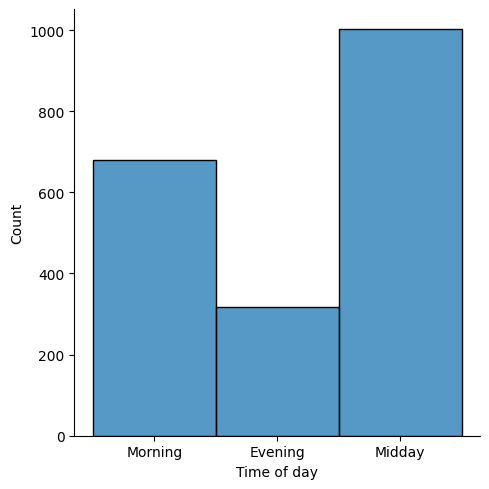

In [14]:
plt.figure(figsize=(12,6))
sns.displot(df['Time of day'], kde = False)

This result comes as a bit of a surprise for me, because I personally thought that most people would do sports and entertaining in the evening, but in this case has the lowest number of bookings (night doesn't even have a single booking)

It would be interesting to see which facilities are booked in what measure during this time of days:

In [15]:
fac_by_time = df.groupby(['Time of day', 'name'])['bookid'].count()
fac_by_time = fac_by_time.sort_values(ascending = False)

In [16]:
fac_by_time

Time of day  name           
Midday       Pool Table         196
             Massage Room 1     161
             Tennis Court 1     119
             Squash Court       119
Morning      Massage Room 1     113
Midday       Snooker Table      109
Morning      Pool Table         107
Midday       Tennis Court 2      99
             Badminton Court     91
             Table Tennis        85
Morning      Tennis Court 2      80
             Badminton Court     79
             Tennis Court 1      79
             Squash Court        76
             Snooker Table       68
Evening      Pool Table          65
Morning      Table Tennis        64
Evening      Massage Room 1      58
             Snooker Table       39
             Table Tennis        38
             Squash Court        34
             Tennis Court 2      27
             Tennis Court 1      25
Midday       Massage Room 2      23
Evening      Badminton Court     21
Morning      Massage Room 2      15
Evening      Massage Room 2      10

This grouping confirms that the most popular time of day is midday, where the most booked out facility is the pool table, a massage room and the tennis court and squash court equally. So it seems the people prefer to relax but also do sports around midday, which could make sense, if they do their booking right after work 

In [17]:
book_by_hour = df.groupby(df['starttime'].dt.strftime('%H:%M'))['bookid'].count()
book_by_hour = book_by_hour.sort_values(ascending = False)

In [18]:
book_by_hour

starttime
08:00    120
11:00    102
16:30    102
14:00     91
15:00     89
12:00     88
19:00     88
08:30     88
18:30     88
13:00     86
17:30     83
12:30     82
11:30     80
15:30     80
14:30     79
09:30     77
16:00     77
18:00     76
17:00     75
10:00     72
09:00     71
10:30     71
13:30     70
19:30     51
20:00     14
Name: bookid, dtype: int64

Again we come across an interesting insight, a lot of people prefer to book some sport activity before work, which again makes sense (they charge up with dopamine). After that first place, we see the midday values tending to dominate the bookings

Let's suppose that the company wants to give out giftcards for the top 3 members with most booking. Let's find them:

For a correct grouping we should concatonate the surname and the firstname into one single column:


In [19]:
df['member_name'] = df['firstname'] +' '+ df['surname']

In [20]:
# We can drop the two previous name columns:

df = df.drop(['firstname', 'surname'], axis = 1)

In [21]:
df.head()

bookid  facid  memid           starttime  slots            name  \
0       0      3      1 2012-07-03 11:00:00      2    Table Tennis   
1       1      4      1 2012-07-03 08:00:00      2  Massage Room 1   
2       2      6      0 2012-07-03 18:00:00      2    Squash Court   
3       3      7      1 2012-07-03 19:00:00      2   Snooker Table   
4       4      8      1 2012-07-03 10:00:00      1      Pool Table   

   membercost  guestcost  initialoutlay  monthlymaintenance  \
0           0          5            320                  10   
1          35         80           4000                3000   
2           4         18           5000                  80   
3           0          5            450                  15   
4           0          5            400                  15   

                      address  zipcode       telephone            joindate  \
0  8 Bloomsbury Close, Boston     4321    555-555-5555 2012-07-02 12:02:05   
1  8 Bloomsbury Close, Boston     4321    555-555-5555 2012-07-02 12:02:05   
2                       GUEST        0  (000) 000-0000 2012-07-01 00:00:00   
3  8 Bloomsbury Close, Boston     4321    555-555-5555 2012-07-02 12:02:05   
4  8 Bloomsbury Close, Boston     4321    555-555-5555 2012-07-02 12:02:05   

  Time of day   member_name  
0     Morning  Darren Smith  
1     Morning  Darren Smith  
2     Evening   GUEST GUEST  
3     Evening  Darren Smith  
4     Morning  Darren Smith

I can see that in my member_name column the guest are called: GUEST GUEST, so I will simply change those strings to a simple 'Guest'

In [22]:
df['member_name'] = df['member_name'].apply(lambda x: x.replace('GUEST GUEST', 'Guest'))

In [23]:
df.head()

bookid  facid  memid           starttime  slots            name  \
0       0      3      1 2012-07-03 11:00:00      2    Table Tennis   
1       1      4      1 2012-07-03 08:00:00      2  Massage Room 1   
2       2      6      0 2012-07-03 18:00:00      2    Squash Court   
3       3      7      1 2012-07-03 19:00:00      2   Snooker Table   
4       4      8      1 2012-07-03 10:00:00      1      Pool Table   

   membercost  guestcost  initialoutlay  monthlymaintenance  \
0           0          5            320                  10   
1          35         80           4000                3000   
2           4         18           5000                  80   
3           0          5            450                  15   
4           0          5            400                  15   

                      address  zipcode       telephone            joindate  \
0  8 Bloomsbury Close, Boston     4321    555-555-5555 2012-07-02 12:02:05   
1  8 Bloomsbury Close, Boston     4321    555-555-5555 2012-07-02 12:02:05   
2                       GUEST        0  (000) 000-0000 2012-07-01 00:00:00   
3  8 Bloomsbury Close, Boston     4321    555-555-5555 2012-07-02 12:02:05   
4  8 Bloomsbury Close, Boston     4321    555-555-5555 2012-07-02 12:02:05   

  Time of day   member_name  
0     Morning  Darren Smith  
1     Morning  Darren Smith  
2     Evening         Guest  
3     Evening  Darren Smith  
4     Morning  Darren Smith

In [24]:
top_members = df.groupby('member_name')['bookid'].count()
top_members = top_members.sort_values(ascending=False)
top_members

member_name
Guest              453
Tim Rownam         275
Darren Smith       188
Tracy Smith        155
Burton Tracy       122
Janice Joplette    116
Tim Boothe         113
Gerald Butters     109
Nancy Dare          74
Charles Owen        63
Timothy Baker       56
Ponder Stibbons     51
David Jones         50
Anne Baker          45
Jack Smith          41
Jemima Farrell      34
Florence Bader      33
David Pinker        18
Matthew Genting      4
Name: bookid, dtype: int64

Text(0, 0.5, 'Members')

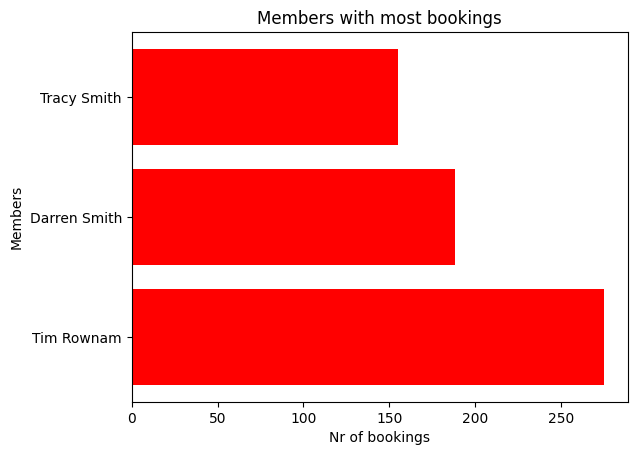

In [25]:
#let's find the members with the highest bookings visually:

plt.barh(top_members[1:4].index, top_members[1:4], color = 'red')
plt.title('Members with most bookings')
plt.xlabel('Nr of bookings', fontsize = 10)
plt.ylabel('Members')

- So obviously guest clients will have the highest number of bookings, but the giftcards can be sent out then to: Tim Rownam, Darren Smith and Tracy Smith

The dataset looks now good enough to be then interpreted in Tableau and PowerBI. There are no missing values, the date columns are in datetime format, no piece of information is unnacounted for. However, one last thing I want to check is a scatterplot with the zipcodes, to see if it's worth creating maps in the visualisation tools.

In [26]:
zip_codes = df.groupby('zipcode')['bookid'].count()
zip_codes

zipcode
0        453
234      229
4321     343
10383     74
23423    275
28563     63
33862     50
45678    122
52365      4
56754    109
57392     34
58393     56
65332     18
69302     41
80743     45
84923     33
87630     51
Name: bookid, dtype: int64

Text(0, 0.5, 'Nr of bookings')

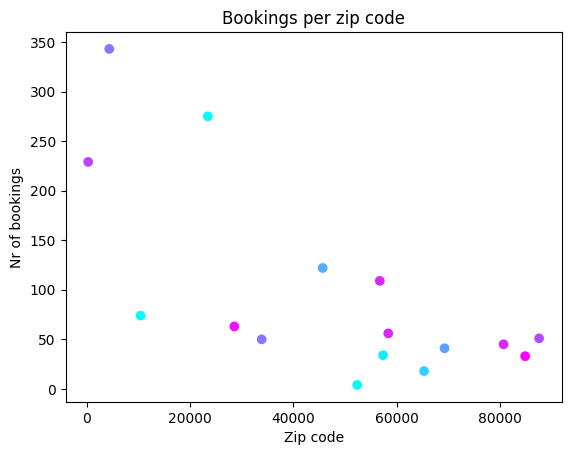

In [27]:
#I will be dropping the 0 zip-code in the plot, since it's for guests with unknown whereabouts

colors = np.random.randint(100, size=(16))

plt.scatter(zip_codes.iloc[1:].index, zip_codes.iloc[1:], c=colors, cmap = 'cool')
plt.title('Bookings per zip code')
plt.xlabel('Zip code')
plt.ylabel('Nr of bookings')

- We can see various aglomerations around certain zip-codes, so I will represent it in a detailed real-world map

In [28]:
df.iloc[[0]]['name'] == 'Table Tennis'

0    True
Name: name, dtype: bool

In [29]:
def pay(df):
    if df['member_name'] == 'Guest':
        return df['guestcost']
    else:
        return df['membercost']


In [30]:
df['pay'] = df.apply(pay, axis = 1)

In [31]:
df.head()

bookid  facid  memid           starttime  slots            name  \
0       0      3      1 2012-07-03 11:00:00      2    Table Tennis   
1       1      4      1 2012-07-03 08:00:00      2  Massage Room 1   
2       2      6      0 2012-07-03 18:00:00      2    Squash Court   
3       3      7      1 2012-07-03 19:00:00      2   Snooker Table   
4       4      8      1 2012-07-03 10:00:00      1      Pool Table   

   membercost  guestcost  initialoutlay  monthlymaintenance  \
0           0          5            320                  10   
1          35         80           4000                3000   
2           4         18           5000                  80   
3           0          5            450                  15   
4           0          5            400                  15   

                      address  zipcode       telephone            joindate  \
0  8 Bloomsbury Close, Boston     4321    555-555-5555 2012-07-02 12:02:05   
1  8 Bloomsbury Close, Boston     4321    555-555-5555 2012-07-02 12:02:05   
2                       GUEST        0  (000) 000-0000 2012-07-01 00:00:00   
3  8 Bloomsbury Close, Boston     4321    555-555-5555 2012-07-02 12:02:05   
4  8 Bloomsbury Close, Boston     4321    555-555-5555 2012-07-02 12:02:05   

  Time of day   member_name  pay  
0     Morning  Darren Smith    0  
1     Morning  Darren Smith   35  
2     Evening         Guest   18  
3     Evening  Darren Smith    0  
4     Morning  Darren Smith    0

Now since we have the cost of the facility for each member individually, we can drop the two 'membercost' and 'guestcost' columns, because they don't bring any new information and I want to feed the visualization tools not extremely large datasets.

In [32]:
df = df.drop(['membercost', 'guestcost'], axis = 1)

In [33]:
df.head()

bookid  facid  memid           starttime  slots            name  \
0       0      3      1 2012-07-03 11:00:00      2    Table Tennis   
1       1      4      1 2012-07-03 08:00:00      2  Massage Room 1   
2       2      6      0 2012-07-03 18:00:00      2    Squash Court   
3       3      7      1 2012-07-03 19:00:00      2   Snooker Table   
4       4      8      1 2012-07-03 10:00:00      1      Pool Table   

   initialoutlay  monthlymaintenance                     address  zipcode  \
0            320                  10  8 Bloomsbury Close, Boston     4321   
1           4000                3000  8 Bloomsbury Close, Boston     4321   
2           5000                  80                       GUEST        0   
3            450                  15  8 Bloomsbury Close, Boston     4321   
4            400                  15  8 Bloomsbury Close, Boston     4321   

        telephone            joindate Time of day   member_name  pay  
0    555-555-5555 2012-07-02 12:02:05     Morning  Darren Smith    0  
1    555-555-5555 2012-07-02 12:02:05     Morning  Darren Smith   35  
2  (000) 000-0000 2012-07-01 00:00:00     Evening         Guest   18  
3    555-555-5555 2012-07-02 12:02:05     Evening  Darren Smith    0  
4    555-555-5555 2012-07-02 12:02:05     Morning  Darren Smith    0

Another column that isn't really worth keeping is the 'initialoutlay' column, since we only have acces to data in the past two months, so we can't do meaningful calculations using the initial payment to build that facility.

In [34]:
df = df.drop(['initialoutlay'], axis = 1)

Lastly, I'm also interested in the revenue produced by each facility (I also did this task in SQL, however, I would want it as a separate column in my dataset)

In [35]:
df['revenue'] = df['pay']*df['slots']

In [36]:
df.head()

bookid  facid  memid           starttime  slots            name  \
0       0      3      1 2012-07-03 11:00:00      2    Table Tennis   
1       1      4      1 2012-07-03 08:00:00      2  Massage Room 1   
2       2      6      0 2012-07-03 18:00:00      2    Squash Court   
3       3      7      1 2012-07-03 19:00:00      2   Snooker Table   
4       4      8      1 2012-07-03 10:00:00      1      Pool Table   

   monthlymaintenance                     address  zipcode       telephone  \
0                  10  8 Bloomsbury Close, Boston     4321    555-555-5555   
1                3000  8 Bloomsbury Close, Boston     4321    555-555-5555   
2                  80                       GUEST        0  (000) 000-0000   
3                  15  8 Bloomsbury Close, Boston     4321    555-555-5555   
4                  15  8 Bloomsbury Close, Boston     4321    555-555-5555   

             joindate Time of day   member_name  pay  revenue  
0 2012-07-02 12:02:05     Morning  Darren Smith    0        0  
1 2012-07-02 12:02:05     Morning  Darren Smith   35       70  
2 2012-07-01 00:00:00     Evening         Guest   18       36  
3 2012-07-02 12:02:05     Evening  Darren Smith    0        0  
4 2012-07-02 12:02:05     Morning  Darren Smith    0        0

- Let's check each facility how much money brought in:

In [37]:
revenue_fac = df.groupby('name')['revenue'].sum()

In [38]:
revenue_fac.sort_values(ascending=False)

name
Massage Room 1     37130
Tennis Court 2      7470
Tennis Court 1      7080
Massage Room 2      6760
Squash Court        6376
Badminton Court      864
Pool Table           120
Snooker Table        120
Table Tennis          70
Name: revenue, dtype: int64

Clear winner it's again, the first massage room.

Last thing I want to do on this database before I visually represent it is to change the name of the columns to make more sense (at least some of them that don't really make that much sense

In [39]:
df = df.rename(columns = {'bookid' : 'BookingID', 'memid':'MemberID',
                         'facid':'FacilityID', 'name':'Facility',
                         'pay':'cost'})

In [40]:
df.head()

BookingID  FacilityID  MemberID           starttime  slots        Facility  \
0          0           3         1 2012-07-03 11:00:00      2    Table Tennis   
1          1           4         1 2012-07-03 08:00:00      2  Massage Room 1   
2          2           6         0 2012-07-03 18:00:00      2    Squash Court   
3          3           7         1 2012-07-03 19:00:00      2   Snooker Table   
4          4           8         1 2012-07-03 10:00:00      1      Pool Table   

   monthlymaintenance                     address  zipcode       telephone  \
0                  10  8 Bloomsbury Close, Boston     4321    555-555-5555   
1                3000  8 Bloomsbury Close, Boston     4321    555-555-5555   
2                  80                       GUEST        0  (000) 000-0000   
3                  15  8 Bloomsbury Close, Boston     4321    555-555-5555   
4                  15  8 Bloomsbury Close, Boston     4321    555-555-5555   

             joindate Time of day   member_name  cost  revenue  
0 2012-07-02 12:02:05     Morning  Darren Smith     0        0  
1 2012-07-02 12:02:05     Morning  Darren Smith    35       70  
2 2012-07-01 00:00:00     Evening         Guest    18       36  
3 2012-07-02 12:02:05     Evening  Darren Smith     0        0  
4 2012-07-02 12:02:05     Morning  Darren Smith     0        0

The dataset is ready to be exported!

In [41]:
df.to_csv('SE Company.csv')

## Tableau VS PowerBI analysis

**In this next part of the project I will analyze the data visually with Tableau and Microsoft PowerBI. Since it's a tiny dataset to analyze, I simply don't have so much meaningful information to create separately a Tableau and a PowerBI dashboard, so I will do mostly the same analysis, but with both tools, to see how they compare.**

First thing that I wanted to analyse using Tableau's map function was the number of bookings and revenue brought in by locations. So actually to see where the company has it's best numbers

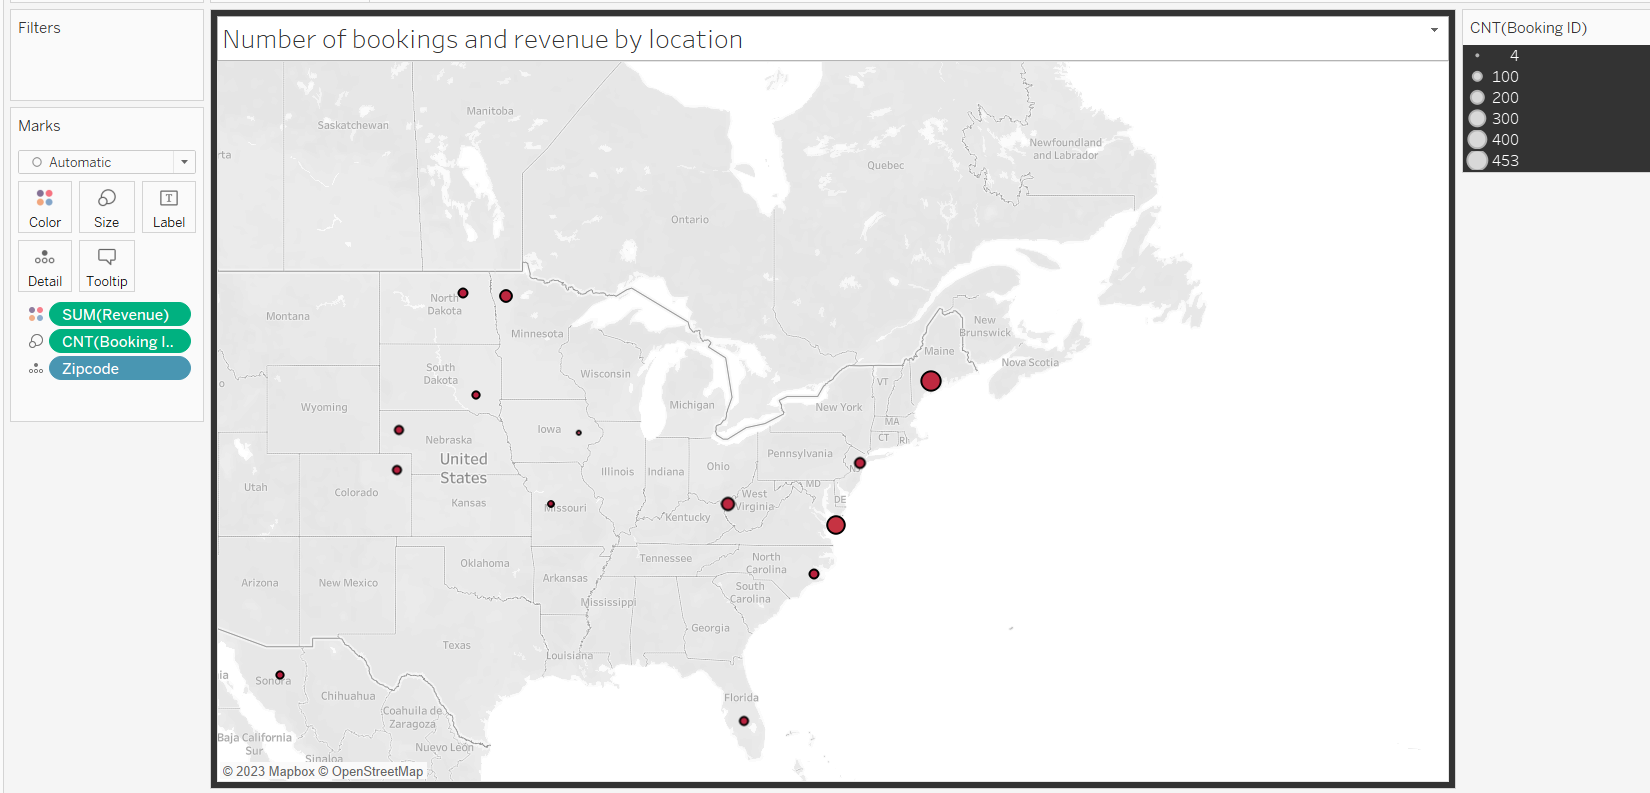

- We can see that the company does best eastern America mostly, and the worst in Iowa. The criteria is again, the count of bookings and brought in revenue (slots * cost of facility rental)

- Later, when preparing the final dashboard I will add in a time filter, to maybe see a difference in the two months

Now it's time to see how this map looks like using PowerBI. Note that Tableau didn't find most of my zip-codes from the dataset, so I had to manually look for lat and long coordinates. Let's see if PowerBI makes our life easier:

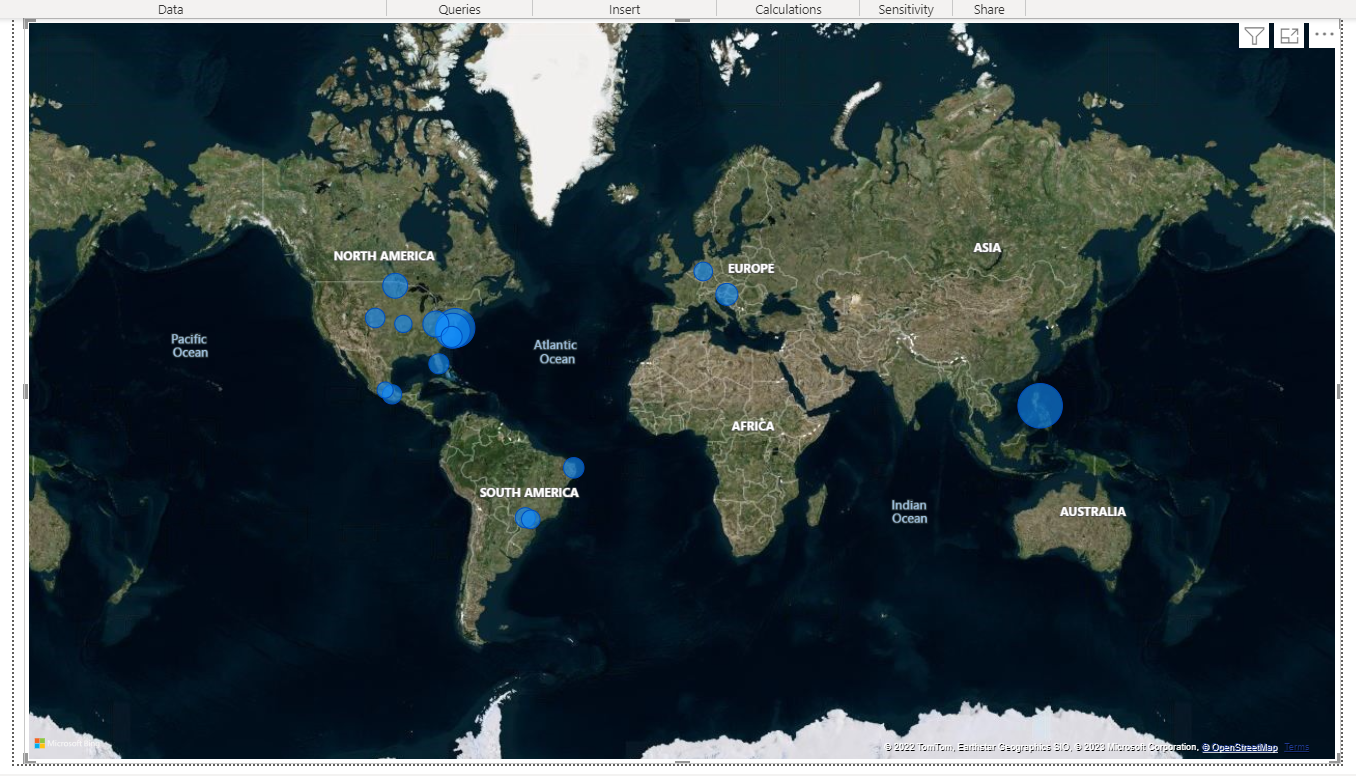

What a big difference !? Since I had to manually look for the lat/long in Tableau (and some zipcodes I didn't even find on the internet), it is clearly full of errors.

However, PowerBI managed to solve all my problems in just a matter of few seconds. Only thing was to change the data type manualy to location, and there it was, this beautiful map. We can see here that the comapny extended also overseas, and maybe has it's best point of bookings in the Philipines. But we should check to know better!

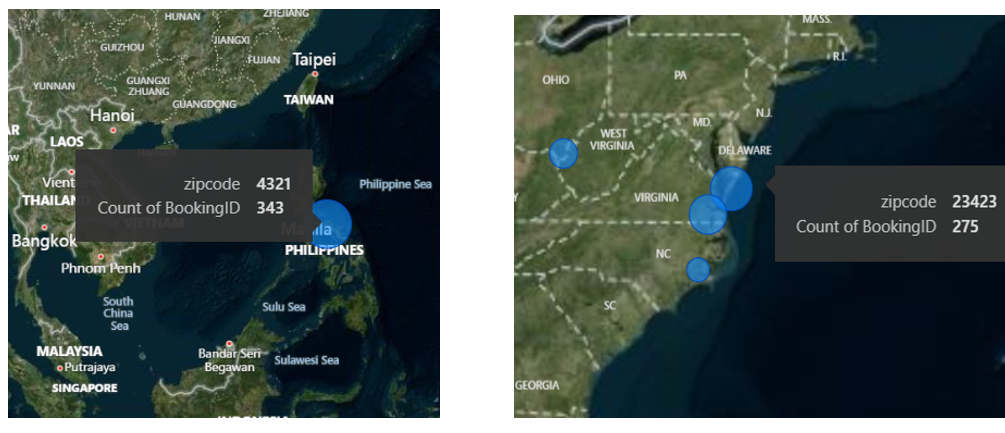

So here I can point out some problems. Clearly Tableau (or me) have left out the highest booking place, which is in Phillipine. This is why we should always double-check our data, because when one starts to search for zip-codes only, and for coordinates, things can get messed up as before, and since Microsoft's PowerBI has live acces to all this information, we should maybe use their mapping functions when the location parameters are unclear

In this next step, since PowerBI presented the data of the Phillipines on the map (and since it's the highest booking place) I decided to see which facilities are they frequently booking:


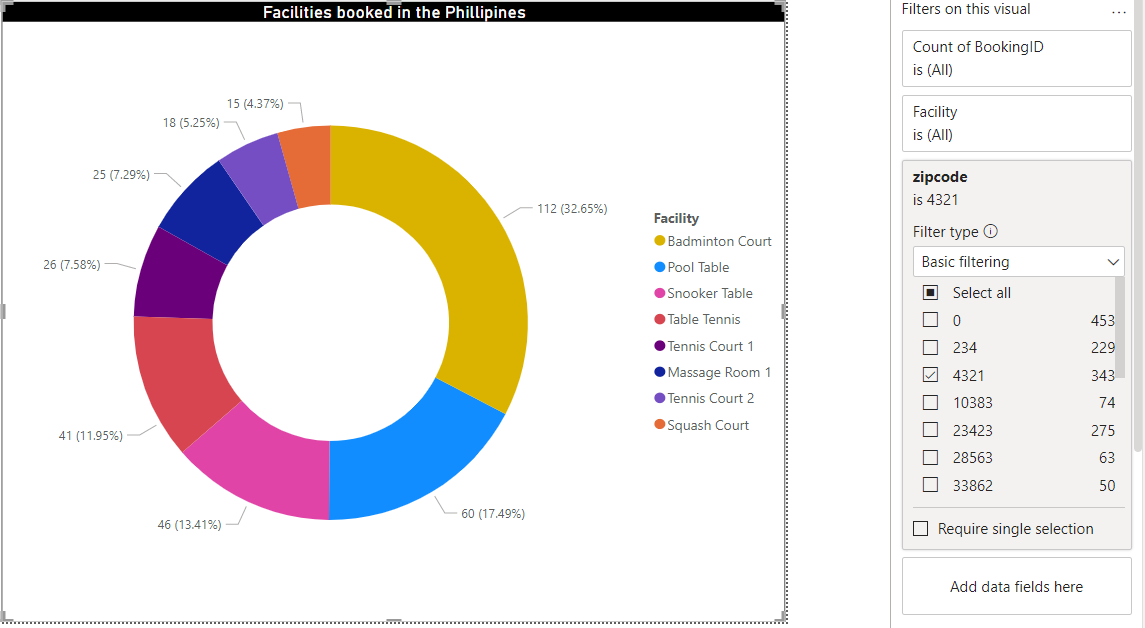

As we can see in this Pie Chart above, most booked facilities in the Phillipines are the badminton court, pool and snookertable. However, the Badminton Court is the most popular, with a dominant 32.65% of all bookings. So thanks to PowerBI, the company can now also know these kind of insights.

Let's continue with our visual data exploration